Привет еще раз! меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Спасибо за  очередную качественную работу, мне она очень понравилась
- Я оставил некоторые советы надеюсь они будут полезными или интересными.
- Техника бутстрап применилась корректно, было проведено тщательное исследование.
- В целом работа почти полностью корректна, но не хватает одной важной метрики, которую хорошо было внести в данную работу.
- Думаю ты быстро с этим справишься=)




<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление[2]</font>
* Спасибо за оперативность
- Приятно видеть фидбек на комментарии.
- Недочеты исправлены - работа полностью корректна
- Рад был быть полезен. Удачи в дальнейшем обучении!

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

# Описание проекта
В данном проекте ищется наиболее переспективный регион для добычи нефти. Всего рассматриваются 3 региона, с индексами "0", "1" и "2". Для каждого из них строится модель (линейная регрессия), которая по входным параметрам может оценивать ожидаемую емкость скважин. Затем с применением подхода bootstrap (1000 итераций) генерируются параметры для 500 скважин по каждому региону, из которых выбирается 200 наиболее перспективных скважин и по ним, на основании имеющихся фактических данных запасов, рассчитывается ожидаемая прибыль для региона. Т.е. проверяется насколько адекватно модель позволяет выбрать 200 скважин с наибольшими запасами и, тем самым, обеспечить максимальную прибыль. Исходя из данных проведенных симуляций выбирается регион с наименьшей вероятностью убытков.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

from math import ceil

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.preprocessing import StandardScaler
#from sklearn.utils import shuffle

from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import GridSearchCV, cross_validate

#from sklearn.dummy import DummyClassifier


RS = 12345

<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты на месте
</div>

In [2]:
# все данные будут храниться в массивах по регионам

data = [
    pd.read_csv('/datasets/geo_data_0.csv'),
    pd.read_csv('/datasets/geo_data_1.csv'),
    pd.read_csv('/datasets/geo_data_2.csv'),
]

In [3]:
for i in range(3):
    print('Region:', i)
    print(data[i].head(), '\n')

Region: 0
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647 

Region: 1
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305 

Region: 2
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746 



In [4]:
for i in range(3):
    print('Region:', i)
    print(data[i].info(), '\n')

Region: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None 

Region: 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None 

Region: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data column

In [5]:
print('Duplicated ids')
for i in range(3):
    print('Region:', i)
    print(data[i].groupby('id').count().query('product > 1')['product'], '\n')

Duplicated ids
Region: 0
id
74z30    2
A5aEY    2
AGS9W    2
HZww2    2
QcMuo    2
Tdehs    2
TtcGQ    2
bsk9y    2
bxg6G    2
fiKDv    2
Name: product, dtype: int64 

Region: 1
id
5ltQ6    2
LHZR0    2
bfPNe    2
wt4Uk    2
Name: product, dtype: int64 

Region: 2
id
KUPhW    2
VF7Jo    2
Vcm5J    2
xCHr8    2
Name: product, dtype: int64 



In [6]:
for i in range(3):
    print('Region:', i)
    print(data[i].describe(), '\n')

Region: 0
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347 

Region: 1
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021    

In [7]:
for i in range(3):
    print('Region:', i)
    print(data[i].corr(), '\n')

Region: 0
               f0        f1        f2   product
f0       1.000000 -0.440723 -0.003153  0.143536
f1      -0.440723  1.000000  0.001724 -0.192356
f2      -0.003153  0.001724  1.000000  0.483663
product  0.143536 -0.192356  0.483663  1.000000 

Region: 1
               f0        f1        f2   product
f0       1.000000  0.182287 -0.001777 -0.030491
f1       0.182287  1.000000 -0.002595 -0.010155
f2      -0.001777 -0.002595  1.000000  0.999397
product -0.030491 -0.010155  0.999397  1.000000 

Region: 2
               f0        f1        f2   product
f0       1.000000  0.000528 -0.000448 -0.001987
f1       0.000528  1.000000  0.000779 -0.001012
f2      -0.000448  0.000779  1.000000  0.445871
product -0.001987 -0.001012  0.445871  1.000000 



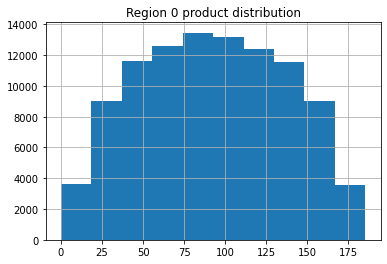

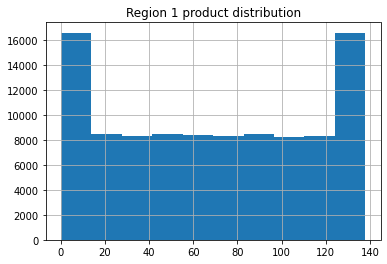

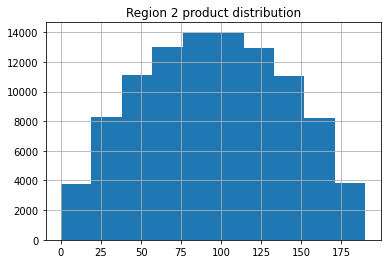

In [8]:
for i in range(3):
    data[i].hist('product', bins=10)
    plt.title('Region {} product distribution'.format(i))

###### Замечания
В целом данные в хорошем состоянии, все численных типов, нет пропусков, разброс достаточно велик, но без ненормальных выбросов и т.д. Единственно, есть дубликаты в id скважин (но не в их параметрах!). Т.к. id для моделей не используется, можно дублированием названий пренебречь.  
На графиках видно необычное распределение скважин для региона "1", которое далеко от нормального и содержит повышенное количество хвостов. Очевидно, это будет способствовать более высоким запасам нефти в лучших 200 скважинах из выборке. Кроме того, можно отметить, что коэффициент корреляции между параметром "f2" и запасами("product") для этого региона необычайно высок и почти равен 1. Т.е. адекватную модель можно было бы построить только с одной этой независимой переменной.  
В других регионах связь между "f2" и запасами также существенно выше, чем с другими параметрами

<div class="alert alert-block alert-success">

<b>Успех:</b> Данные осмотрены 

</div>




<div class="alert alert-block alert-info">
<b>Совет </b>  Советую обратить внимание на библиотеки sweetviz и pandas_profiling помогут в проведении более тщательного EDA анализа. Исследовательский анализ можно делать и с помощью ручного вызова функций дефолтных библиотек. Данные библиотеки хороши для максимизации комфорта презентации результатов анализа бизнес-пользователям. 
    
Очень просты в использоовании, на вход кладется датафрейм: pandas_profiling.ProfileReport(df) 
    
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b>
Хорошо, спасибо!
</div>

## Обучение и проверка модели

In [9]:
# зависимая переменная - product, остальные - независимые

features_columns = [
    'f0',
    'f1',
    'f2',
]
target_columns = [
    'product',
]

In [10]:
X = [data[i][features_columns] for i in range(3)]
y = [data[i][target_columns] for i in range(3)]

In [11]:
train_size = 0.75
valid_size = 0.25

X_train = [None] * 3
y_train = [None] * 3
X_valid = [None] * 3
y_valid = [None] * 3

for i in range(3):
    X_train[i], X_valid[i], y_train[i], y_valid[i] = train_test_split(
        X[i],
        y[i],
        test_size=valid_size,
        random_state=RS,
    )
    print('Data shapes for region', i)
    print(X_train[i].shape)
    print(y_train[i].shape)
    print(X_valid[i].shape)
    print(y_valid[i].shape)
    print()

Data shapes for region 0
(75000, 3)
(75000, 1)
(25000, 3)
(25000, 1)

Data shapes for region 1
(75000, 3)
(75000, 1)
(25000, 3)
(25000, 1)

Data shapes for region 2
(75000, 3)
(75000, 1)
(25000, 3)
(25000, 1)



In [12]:
# обучаемся на тренировочной выборке,проверяем качество на валидационной 

models = [LinearRegression() for i in range(3)]
y_pred = [None] * 3
for i in range(3):
    models[i].fit(X_train[i], y_train[i])
    y_pred[i] = models[i].predict(X_valid[i])
    print('Region', i)
    print('RMSE:', mean_squared_error(y_valid[i], y_pred[i], squared=False))
    print('r2:', r2_score(y_valid[i], y_pred[i]))
    print('mean:', y_pred[i].mean())
    print()


Region 0
RMSE: 37.5794217150813
r2: 0.27994321524487786
mean: 92.59256778438035

Region 1
RMSE: 0.893099286775617
r2: 0.9996233978805127
mean: 68.728546895446

Region 2
RMSE: 40.02970873393434
r2: 0.20524758386040443
mean: 94.96504596800489



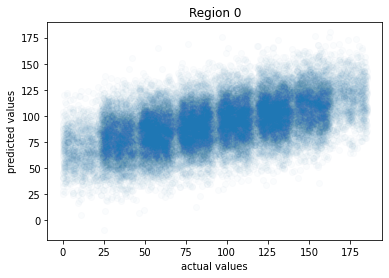

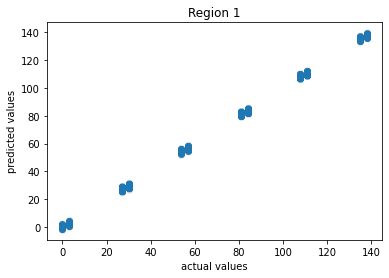

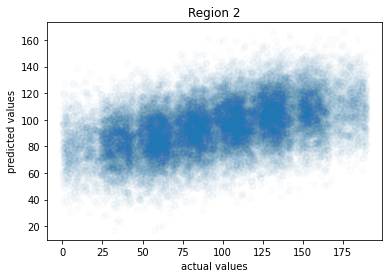

In [13]:
for i in range(3):
    #a = y_valid[i]['product'].tolist()
    #b = y_pred[i].ravel().tolist()
    #errors = [(a[i] - b[i])**2 for i in range(len(a))]
    #pd.Series(errors).hist(bins=100)
    plt.scatter(y_valid[i]['product'], y_pred[i], alpha=0.02)
    plt.title('Region {}'.format(i))
    plt.xlabel('actual values')
    plt.ylabel('predicted values')
    plt.show()


###### Замечания
Как и ожидалось, наиболее точную модель, с r2 близким к 1 удалось построить дла региона "1", для остальных регионов данный показатель откровенно низок и находится на уровне 0.20-0.28. Это же видно на графиках - для региона "1" точки прогноза и факта укладываются в прямую, делящую плоскость пополам (хотя график совсем странный, с большми и равномерными интервалами между областями скопления точек), по остальным регионам получились "облака", заметно более горизонатально расположенные.  
Качество моделей подтверждается размером средней квадратической ошибки - близко к 0 для региона "1" и около 40 для остальных (при средних 90-95). 

<div class="alert alert-block alert-success">
<b>Успех:</b> Шаг проделан лаконично, все нужные метрики посчитаны корректно. 
</div>


## Подготовка к расчёту прибыли

In [14]:
# константы для дальнейшей работы

BUDGET_REGION = 10_000_000_000
INCOME_BARREL_THS = 450_000
LOSS_THRESHOLD = 0.025
NUM_WELLS_DEVELOP = 200
#barrels_break_even_ths = budget_region / income_1ths_barrels
BARRELS_BREAK_EVEN_THS= ceil(BUDGET_REGION / INCOME_BARREL_THS) # оруглено вверх


<div class="alert alert-block alert-info">
    
<b>Совет:</b> Константы принято записывать в верхнем регистре. А большие значения удобнее было бы записсывать следующим образом  `income_1ths_barrels = 450_000` - записи идентичны

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b>
Да, что-то расслабился, забыл привести в нормальный вид ) Исправил.
</div>

<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Есть)
</div>


In [15]:
print('ths barrels to break-even:', '\t\t\t\t\t\t{:,.0f}'.format(BUDGET_REGION / INCOME_BARREL_THS))
print('average deposits per well needed to break-even (200 wells assumed):', '\t{:,.0f}'.format(BUDGET_REGION / INCOME_BARREL_THS / 200), '\n')

for i in range(3):
    print('Region', i)
    print('mean product per well, ths barrels:', '\t{:,.0f}'.format(data[i]['product'].mean()))
    print('average wells needed to break-even:', '\t{:,.0f}'.format(BUDGET_REGION / INCOME_BARREL_THS / data[i]['product'].mean()))
    print('sum of {} largest wells, ths barrels:'.format(NUM_WELLS_DEVELOP), '\t{:,.0f}'.format(data[i]['product'].sort_values(ascending=False)[:200].sum()))
    print()

ths barrels to break-even: 						22,222
average deposits per well needed to break-even (200 wells assumed): 	111 

Region 0
mean product per well, ths barrels: 	93
average wells needed to break-even: 	240
sum of 200 largest wells, ths barrels: 	36,967

Region 1
mean product per well, ths barrels: 	69
average wells needed to break-even: 	323
sum of 200 largest wells, ths barrels: 	27,589

Region 2
mean product per well, ths barrels: 	95
average wells needed to break-even: 	234
sum of 200 largest wells, ths barrels: 	37,910



###### Замечания
Для того, чтобы инвестиции окупились требуется добыть не менее 22222 тыс. бареллей, что довольно много. Это означает, что средний размер запасов на скважину в выбираемых к разработке 200 должен составить 111 тыс. бареллей, что больше среднего по всем скважинам отдельных регионов (причем, средние запасы Средние запасы нефти на скважину заметно выше в регионах "0" и "2" и превышает 90 тыс. бареллей по сравнению с менее 70 тыс. бареллей в регионе "1").  
Т.е. прибыль при случайном выборе скважин совсем не гарантирована. Однако 200 лучших скважин в каждом из регионов, как видно, содержат достаточное количество нефти (от 27 до 38 тыс. бареллей), чтобы обеспечить окупаемость. 

<div class="alert alert-block alert-info">
<b>Совет:</b> Вывод корректен, но нас вроде заказчик просил посчитать значение для 1 скважины)
  
</div>


<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b>
Вот это задание:
<br>
    <i>"3.2. Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе."
</i>
<br>
не очень понял. В затратах 10 млрд. руб., их одной скважиной, очевидно, не окупить. Добавил расчет какой запас должен быть в средней скважине.
</div>

<div class="alert alert-block alert-success">
<b>Ответ[2]:</b> Их не нужно окупать одной) Нужно окупить используя 200, просто имелось ввиду посчитать какой объем сырья должен был быть на 1 скважину из этих 200.
</div>


In [16]:
def income_est(predicted, actual, num_wells, income_unit, investments):
    """
    Функция возвращает оценку прибыли исходя из предсказанных запасов, фактических, количества скважин в разработке,
    прибыли на 1 тыс. бареллей и общего размера инвестиций
    """
    selected = actual[
        predicted.sort_values(ascending=False).index
    ][:num_wells]
    return income_unit * selected.sum() - investments

<div class="alert alert-block alert-success">
<b>Успех:</b> Ф-ция подсчета прибыли определена верно
  
</div>

## Расчёт прибыли и рисков 

In [17]:
state = np.random.RandomState(RS)
repeats = 1000

In [18]:
# процедура bootstrap

profits = [[], [], []]
for _ in range(repeats):
    for i in range(3):
        sampled = X_valid[i].join(y_valid[i]).sample(n=500, replace=True, random_state=state)
        #sampled = data[i].sample(n=500, replace=True, random_state=state)
        y_sampled = sampled[target_columns].reset_index(drop=True).squeeze()
        y_predicted = models[i].predict(sampled[features_columns]).ravel()
        profits[i].append(
            income_est(
                pd.Series(y_predicted),
                y_sampled,
                NUM_WELLS_DEVELOP,
                INCOME_BARREL_THS,
                BUDGET_REGION,
            )
        )


<div class="alert alert-block alert-success">
<b>Успех:</b> С бутстрапом тоже все в поряжке
  
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Также нужно посчитать риск убытков для каждого региона (долю отрицательной прибыли)
  
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b>
Добавил и немного отредактировал вывод
</div>

<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Есть контакт)
</div>


Region 0
Average profit:		384,260,329
2.5%-quantile:		-148,694,266
97.5%-quantile:		909,153,837
Standard deviation:	276,715,954
Probability of loss: 	8.3%


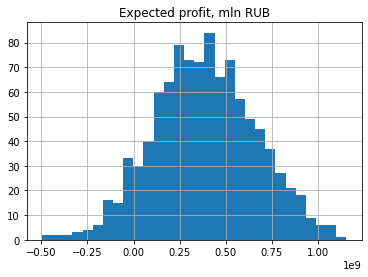


Region 1
Average profit:		455,016,072
2.5%-quantile:		48,072,046
97.5%-quantile:		848,709,853
Standard deviation:	203,042,454
Probability of loss: 	1.5%


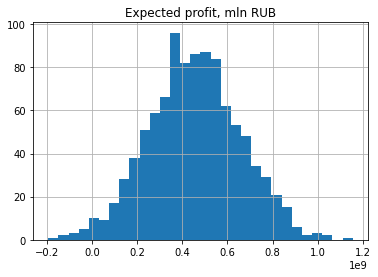


Region 2
Average profit:		380,893,248
2.5%-quantile:		-146,453,456
97.5%-quantile:		945,355,945
Standard deviation:	275,449,084
Probability of loss: 	9.0%


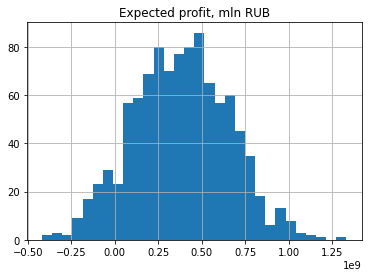

In [19]:
from statsmodels.distributions.empirical_distribution import ECDF

for i in range(3):
    profits_series = pd.Series(profits[i])
    lower = profits_series.quantile(LOSS_THRESHOLD)
    higher = profits_series.quantile(1 - LOSS_THRESHOLD)

    mean = profits_series.mean()
    print('Region', i)
    print('Average profit:\t\t{:,.0f}'.format(float(mean)))
    print('{}%-quantile:\t\t{:,.0f}'.format(LOSS_THRESHOLD * 100, float(lower)))
    print('{}%-quantile:\t\t{:,.0f}'.format((1 - LOSS_THRESHOLD) * 100, float(higher)))
    print('Standard deviation:\t{:,.0f}'.format(np.std(profits_series)))
    print('Probability of loss: \t{:.1%}'.format(profits_series.le(0).mean()))
    profits_series.hist(bins=30)
    plt.title('Expected profit, mln RUB')
    plt.show()
    print()

###### Замечания
По итогам проведенных имитаций получилось, что наиболее перспективным регионам для организации добычи является регион "1" - только в нем ожидается прибыль не менее, чем с 95% вероятностью, а также максимальное среднее значение прибыли. Этому явно способствовало более высокое качество модели, т.е. более точная оценка запасов и, таким образом, максимальные шансы выбрать для разработки скважины с действительно максимальными запасами. Вероятно, распределение скважин с высокими "хвостами" также обеспечило повышенную среднюю величину запасов среди отбираемых для разработки 200 скважин.  
На графиках видно, что распределение ожидаемой прибыли для региона "1" имеет наиболее близкую к нормальному распределенюю форму, а также меньший разброс значений.

# Вывод
Для разработки следует выбрать регион "1". В этом регионе с вероятностью 97,5% удастся получить прибыль не менее 48 млн. руб., в то время как в регионах "0" и "2" вероятность убытков превышает 2.5% - составляет 8.3% и 9.0% соответственно.

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично! Проведено детальное исследование, написан логичный вывод и был выбран правильный регион, поздравляю!
    
  
</div>
 
 

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован